In [3]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation


length = 5
dx=0.01
k = 0.466
t = 500
delta_t = 0.0001


def heat_equation(simulation:np.ndarray,t:int,x:int,k:float,delta_t:float)->float:
    """ 
    function that accepts the location of a point in the rod and the time and returns it's temperature
    dT/dt = k/2((T3-T2)-(T2-T1)) is the change in temperature
    and then according to euler
    T = dT/dt*delta_t+T2)
    """
    T1=simulation[t,x-1]
    T2=simulation[t,x]
    T3=simulation[t,x+1]
    derTemp = (k/2)*(((T3-T2)-(T2-T1))/dx**2) 
    return derTemp*delta_t+T2

def heat_simulation(init_conditions:np.ndarray,p_amnt:float,k:float,t:float,delta_t:float):
    """ this constructs the 1d heat simulation
    """
    simulation = np.zeros(shape=(t,p_amnt+2))
    simulation[0,1:p_amnt+1]=init_conditions
    for i in range(1,t):
        for j in range(1,p_amnt+1):
            simulation[i,j]=heat_equation(simulation,i-1,j,k,delta_t)
        simulation[i,p_amnt+1]=simulation[i,p_amnt-1]
        simulation[i,0]=simulation[i,2]
    return simulation

init_conditions = np.zeros(int(length/dx))
init_conditions[5] = 2
simulation = heat_simulation(init_conditions,int(length/dx),k,t,delta_t)



Text(0.5, 1.0, 'Temperature Distribution Over Time')

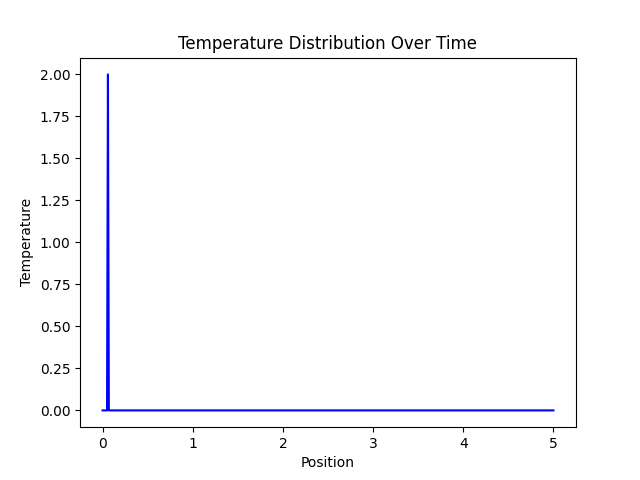

In [5]:
%matplotlib widget
# Function to update the plot for each frame of the animation
def update(frame):
    line.set_ydata(simulation[frame])
    return line,

# Initialize the plot
fig, ax = plt.subplots()
x_values = np.linspace(0, length, int(length / dx) + 2)
line, = ax.plot(x_values, simulation[0], color='blue')

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=range(t), interval=5)

plt.xlabel('Position')
plt.ylabel('Temperature')
plt.title('Temperature Distribution Over Time')


In [39]:
x=3
1<x<4

True